## Initial Data Exploration and Visualization

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", context="talk")

# loading data and basic data exploration
df = pd.read_csv("team_season_features_v2_clean-2.csv")
df.head()
print("Seasons:", df['season'].nunique(), " | Teams:", df['team'].nunique())
print("Champion count:", df['champion'].sum())


Seasons: 41  | Teams: 30
Champion count: 41


### Feature Interaction Heatmap

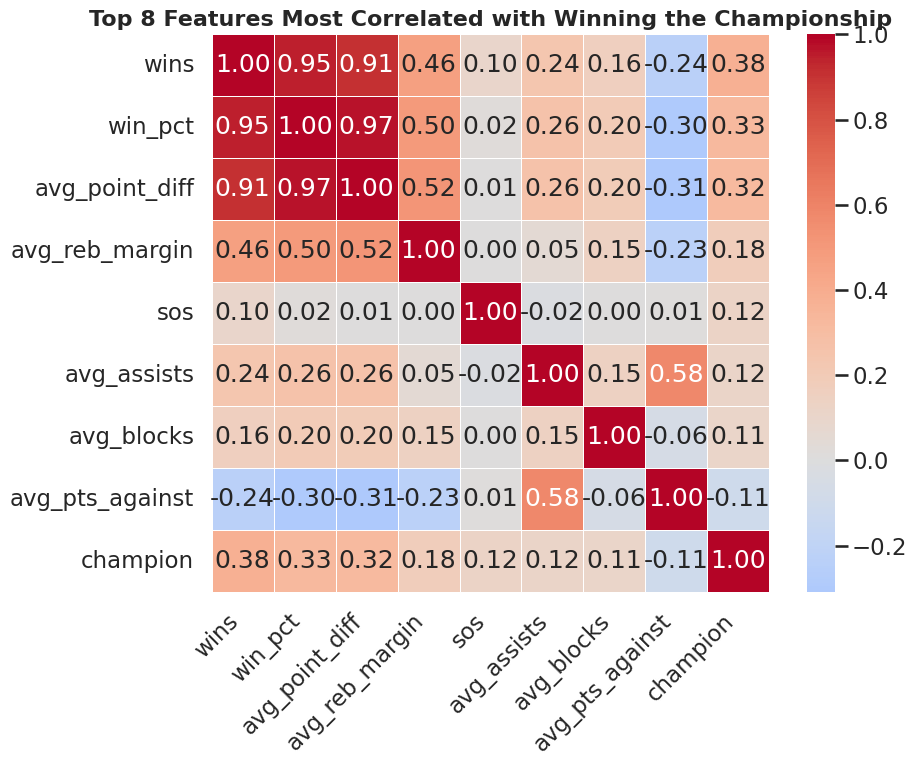

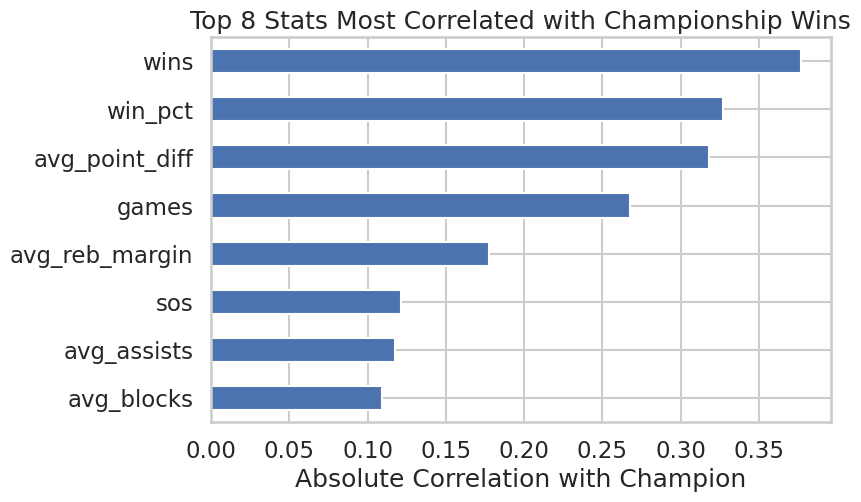

In [22]:
# Top 8 features most correlated with championship wins
corr = df.corr(numeric_only=True)

# Drop 'games' before ranking features
corr_filtered = corr.drop(index='games', columns='games', errors='ignore')

# Get top 8 features most correlated with 'champion'
top_features = corr_filtered['champion'].abs().sort_values(ascending=False)[1:9].index

# Create subset for heatmap
subset = df[top_features.to_list() + ['champion']]
corr_subset = subset.corr()

# Plot clean heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_subset,
    annot=True, fmt=".2f",
    cmap='coolwarm', center=0,
    linewidths=0.5, square=True
)
plt.title("Top 8 Features Most Correlated with Winning the Championship", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
corr['champion'].abs().sort_values(ascending=False)[1:9].plot(kind='barh', color='b')
plt.title("Top 8 Stats Most Correlated with Championship Wins")
plt.xlabel("Absolute Correlation with Champion")
plt.gca().invert_yaxis()
plt.show()


#it's interesting to see avg_reb_margin being one of these features, as it indicates the importance of time in posession

### Exploring Relationship between Offensive and Defensive Balance, and how it affects champions

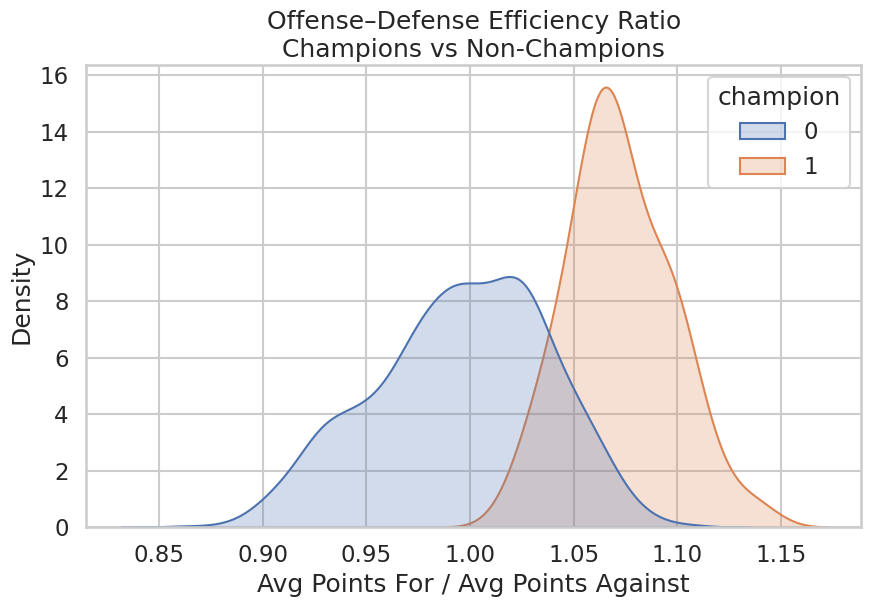

In [23]:

df['off_def_ratio'] = df['avg_pts_for'] / df['avg_pts_against']

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='off_def_ratio', hue='champion', fill=True, common_norm=False)
plt.title("Offense–Defense Efficiency Ratio\nChampions vs Non-Champions")
plt.xlabel("Avg Points For / Avg Points Against")
plt.show()



#### Takeaways:


*   **Championship teams consistently outperform their opponents.**
The orange curve (champions) is shifted to the right, showing that title-winning teams usually score 5–10% more points per game than they allow. That might not sound huge, but over a season, it’s the difference between a solid team and a dominant one.
*   **There’s a clear cutoff for elite performance.**
Teams with an offense–defense ratio below about 1.03 rarely win championships. This means that even small efficiency gaps separate “good” from “great” teams.

*   The plot tells us that to be a contender, a team needs to sustain positive scoring margins, not just win close games. Consistent dominance, not luck, predicts championships.



### League Parity Over Time

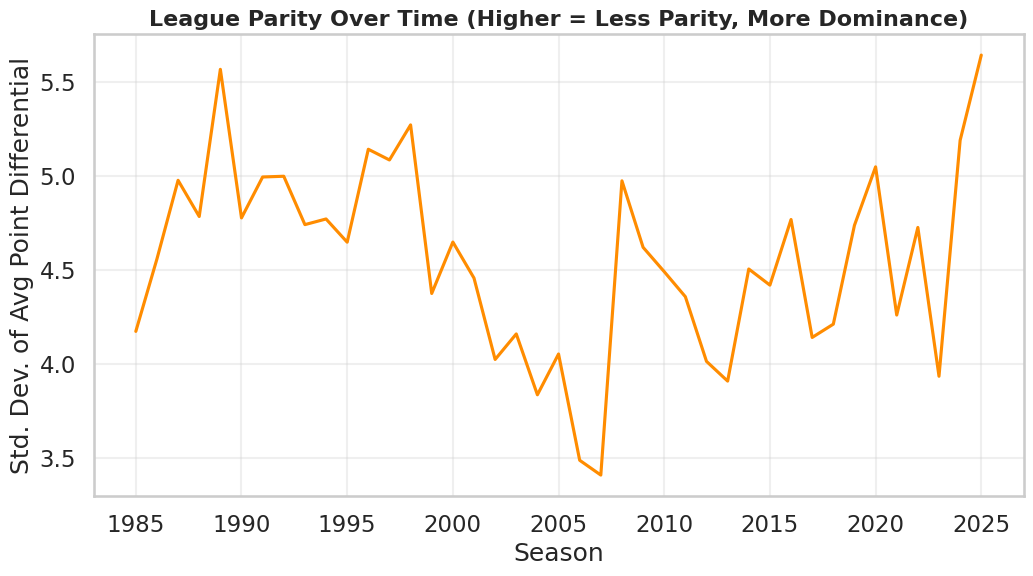

In [24]:

# Compute year-to-year variability (spread of dominance)
spread = df.groupby('season')['avg_point_diff'].std().reset_index(name='point_diff_std')

plt.figure(figsize=(12,6))
sns.lineplot(data=spread, x='season', y='point_diff_std', color='darkorange')
plt.title("League Parity Over Time (Higher = Less Parity, More Dominance)", fontsize=16, weight='bold')
plt.xlabel("Season")
plt.ylabel("Std. Dev. of Avg Point Differential")
plt.grid(alpha=0.3)
plt.show()


### Takeaways:

* The y-axis represents the standard deviation of average point differentials across all NBA teams in each season.

  Higher values mean a larger gap between the best and worst teams (low parity, more dominance).

  Lower values mean teams were more evenly matched (high parity, more balance).

* **1980s–1990s**: Big gaps, dominance era
The graph starts high (around 5.0–5.5) — this means teams were less balanced.
A few dominant franchises (like the Lakers, Celtics, and Bulls later) were consistently outscoring opponents by large margins.

* **Early 2000s**: A balanced league
Around the 2000–2006 range, the standard deviation drops sharply (down to ~3.5–4.0).
This indicates a more balanced league, where the difference between elite and average teams was smaller.
Think of this as the era where more teams could realistically compete — Spurs, Pistons, Mavericks, Suns, etc.

* **Late 2000s–2010**s: Moderate balance, then superteams
Parity fluctuates but rises again — corresponding with the Miami Heat “Big 3” and later the Golden State Warriors dynasty.
Those teams dominated the league, increasing point differentials and reducing parity.

* **2020s**: Parity collapsing again
The final spike near 2024–2025 shows the highest spread since the late 1980s, suggesting dominance by a few top-tier teams again.
This could reflect superteam formations, tanking strategies, or uneven conference strength.



### Which Stats Separate Championship Caliber Teams?

/tmp/ipython-input-2989257198.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Diff'], y=summary.index, palette='coolwarm')


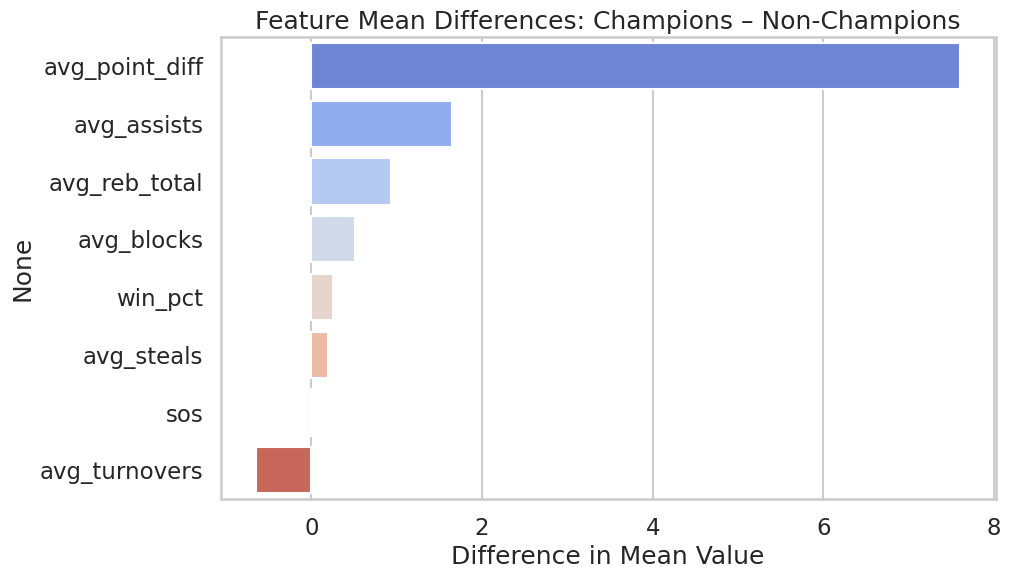

In [17]:

stat_cols = ['win_pct','avg_point_diff','avg_assists','avg_reb_total',
             'avg_turnovers','avg_steals','avg_blocks','sos']
summary = df.groupby('champion')[stat_cols].mean().T
summary.columns = ['Non-Champ','Champ']
summary['Diff'] = summary['Champ'] - summary['Non-Champ']
summary.sort_values('Diff', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x=summary['Diff'], y=summary.index, palette='coolwarm')
plt.title("Feature Mean Differences: Champions – Non-Champions")
plt.xlabel("Difference in Mean Value")
plt.show()

# Interpretation:
# Which features most distinguish champions — e.g., point diff, rebounding, turnover rate.

